# Group 17 DSCI Project (Section 007)
### Predicting diabetes based on demographic attributes, medical history, and clinical measurements

Darby Quinn #19752633 <br>
Manav Parikh #13928775 <br>
Nitya Goel #89433221 <br>
Reeva Bansal #68061514 <br>

### Introduction

Diabetes is a common condition that affects people of all ages. In individuals with diabetes, the body either doesn't make enough insulin or can’t use insulin properly. This can cause serious health problems such as heart disease, vision loss, kidney disease and high blood pressure (BP). There are certain medical factors (e.g. BMI, age, insulin and glucose levels) that can help predict whether an individual is likely to have or develop diabetes. Using these factors and making predictions on whether someone has diabetes can help ensure that proper precautions are taken or treatments are administered to manage the negative short and long term effects of diabetes.

The question we are answering is: **Can we classify whether or not someone has diabetes based on their blood pressure, BMI and age?**

The dataset we are using to answer this question is a Diabetes dataset from the online website Kaggle with nine different columns: number of pregnancies; blood glucose level; BP; skin thickness; blood insulin level; BMI; diabetes pedigree function; age; and outcome. It is a .csv file that is pre-divided into training and testing data, with no missing values. The dataset has previously been useful in using classification to predict diabetes outcome, as well as studying risk factors and diabetes management. 

In [1]:
#loading libraries needed to perform classification and analysis
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Methods & Results

The general procedure we will follow will be:
1. Reading the data into R from the web
2. Ensuring the data is in a tidy format
3. Summarizing the data to select the predictor variables
4. Performing exploratory data analysis and creating a visualization
5. Determining the best K-value to use by cross validation
6. Creating the the K-nearest neighbors classifier with the training set 
7. Finalizing the model and recipe needed to train the classifier
8. Determining the accuracy of the classifier

#### 1. Reading the data into R from the web
The data set is located on kaggle at https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/data. We will load the training and testing data into R using the download.file and read.csv functions, then display the first 6 observations of each set.

In [2]:
#reading in training data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Training%20(1).csv"
download.file(url, "Training%20(1).csv")
training_data <- read.csv("Training%20(1).csv")
head(training_data)

#reading in testing data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Testing.csv"
download.file(url, "Testing.csv")
testing_data <- read.csv("Testing.csv")
head(testing_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,9,120,72,22,56,20.8,0.733,48,0
2,1,71,62,0,0,21.8,0.416,26,0
3,8,74,70,40,49,35.3,0.705,39,0
4,5,88,78,30,0,27.6,0.258,37,0
5,10,115,98,0,0,24.0,1.022,34,0
6,0,124,56,13,105,21.8,0.452,21,0


#### 2. Ensuring the data is in a tidy format
Tidy data refers to a dataset where every variable is in its own column, each observation is in its own row and each value has its own cell. By inspecting the data frames above, we determine that the training and testing datasets are already tidy. 

#### 3. Summarizing the data to select the predictor variables
Our next step is to wrangle the datasets so that they only contain the variables of interest. In our case, these are BMI, Blood Pressure, Age, and the Outcome. This will be done through the select function. The Outcome variable will be renamed to Diabetes_Outcome, and its values from 1 and 0 to "yes" and "no" for more clarity using the mutate and rename functions. 

In [3]:
#summarizing training data
training_data_small <- training_data |>
    select(BMI, BloodPressure, Age, Outcome) |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) |>
    rename(Diabetes_Outcome = Outcome, Blood_Pressure = BloodPressure)
head(training_data_small)

#summarizing testing data
testing_data_small <- testing_data |>
    select(BMI, BloodPressure, Age, Outcome) |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) |>
    rename(Diabetes_Outcome = Outcome, Blood_Pressure = BloodPressure)
head(testing_data_small)

,BMI,Blood_Pressure,Age,Diabetes_Outcome
,<dbl>,<int>,<int>,<fct>
1,33.6,72,50,Yes
2,26.6,66,31,No
3,23.3,64,32,Yes
4,28.1,66,21,No
5,43.1,40,33,Yes
6,25.6,74,30,No


,BMI,Blood_Pressure,Age,Diabetes_Outcome
,<dbl>,<int>,<int>,<fct>
1,20.8,72,48,No
2,21.8,62,26,No
3,35.3,70,39,No
4,27.6,78,37,No
5,24.0,98,34,No
6,21.8,56,21,No


#### 4. Performing exploratory data analysis and creating a visualization
Before proceeding with our formal classification, we will perform some exploratory analysis by checking for missing values, determing the mean of each predictor value, and creating histograms to visualize the distribution of each variable. 

To start, we will determine whether or not there are any missing values in the training and testing dataset using the map_df function, then create a table to clearly summarize the findings. 

In [4]:
#checking for NAs in training dataset
training_missing <- training_data_small |>
    map_df(is.na) |>
    group_by(Age, BMI, Blood_Pressure) |>
    summarize()

training_missing_table <- training_missing |>
    pivot_longer(Age:Blood_Pressure, names_to = "Predictors", values_to = "Has NA")
training_missing_table

#checking for NAs in testing dataset
testing_missing <- testing_data_small |>
    map_df(is.na) |>
    group_by(Age, BMI, Blood_Pressure) |>
    summarize()

testing_missing_table <- testing_missing |>
    pivot_longer(Age:Blood_Pressure, names_to = "Predictors", values_to = "Has NA")
testing_missing_table

`summarise()` has grouped output by 'Age', 'BMI'. You can override using the
`.groups` argument.


Predictors,Has NA
<chr>,<lgl>
Age,FALSE
BMI,FALSE
Blood_Pressure,FALSE


`summarise()` has grouped output by 'Age', 'BMI'. You can override using the
`.groups` argument.


Predictors,Has NA
<chr>,<lgl>
Age,FALSE
BMI,FALSE
Blood_Pressure,FALSE


By inspection of the above tables, it is clear that there are no missing values in the training and testing datasets. For further exploration, we will create a table of the mean of each predictor value in the training and testing set.

In [5]:
#creating table for mean of all training predictor variables
training_mean <- training_data_small |>
    select(Age, BMI, Blood_Pressure) |>
    map_df(mean)

training_mean_table <- training_mean |>
    pivot_longer(Age:Blood_Pressure, names_to = "Predictors", values_to = "Mean")
training_mean_table

#creating table for mean of all testing predictor variables
testing_mean <- testing_data_small |>
    select(Age, BMI, Blood_Pressure) |>
    map_df(mean)

testing_mean_table <- testing_mean |>
    pivot_longer(Age:Blood_Pressure, names_to = "Predictors", values_to = "Mean")
testing_mean_table

Predictors,Mean
<chr>,<dbl>
Age,32.82195
BMI,31.99045
Blood_Pressure,68.91504


Predictors,Mean
<chr>,<dbl>
Age,33.73052
BMI,31.86591
Blood_Pressure,69.50325


The tables above show us that the mean Age, BMI, and Blood Pressure for the training and testing data sets are similar values. To better visualize the full distribution of these variables in both data sets, we will create histogram plots for each predictor variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


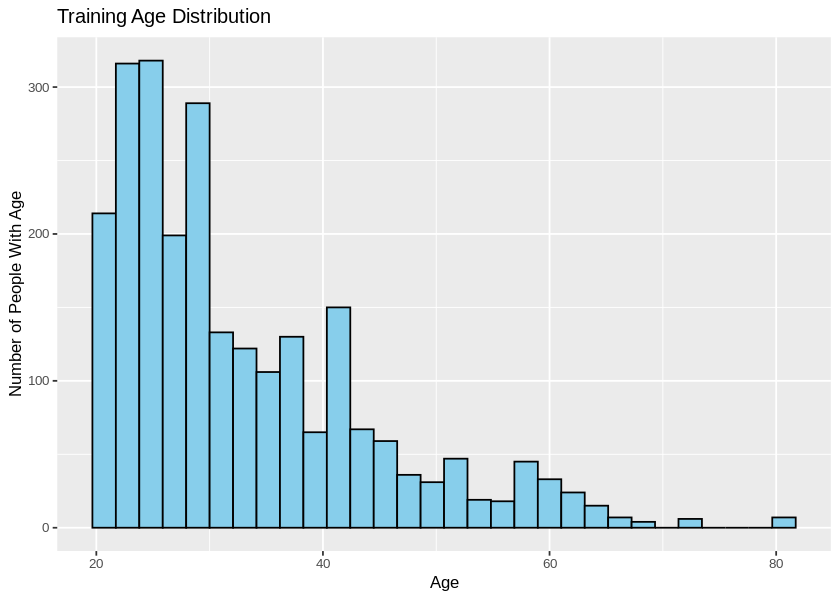

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


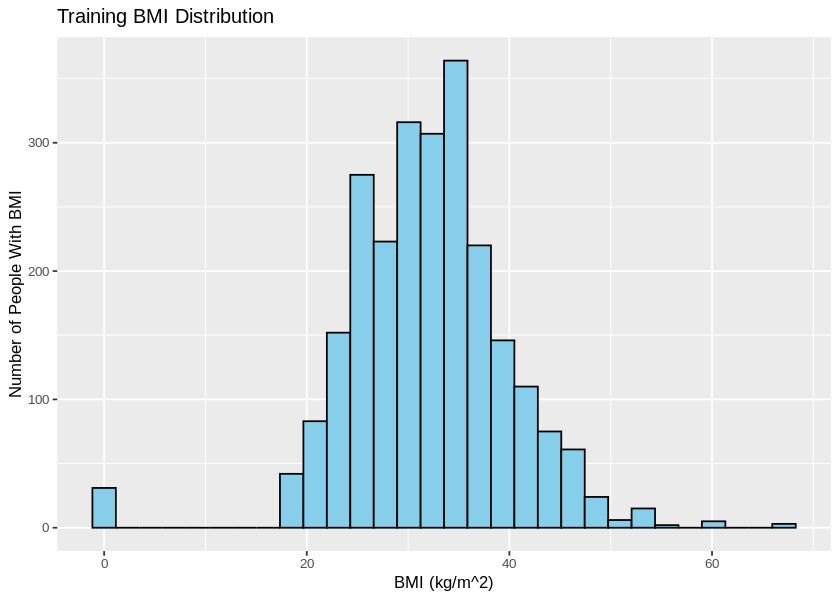

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


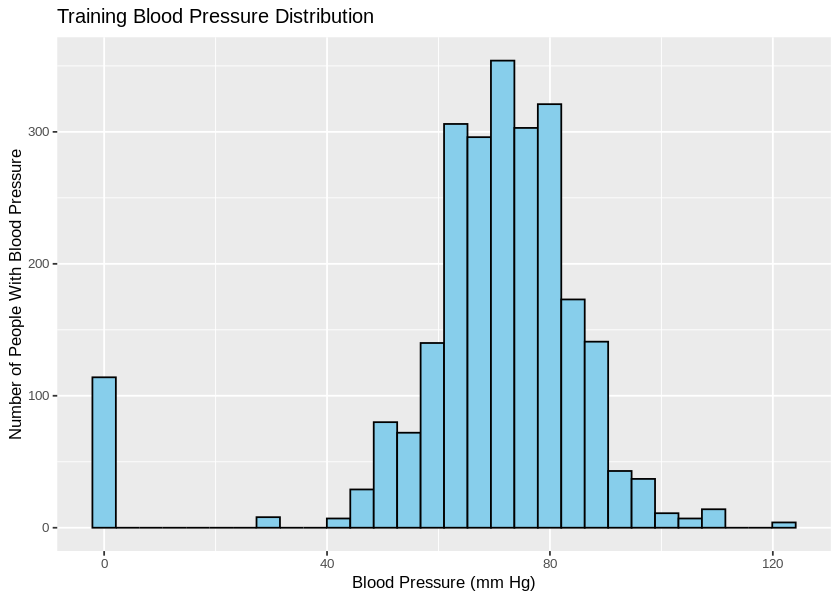

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


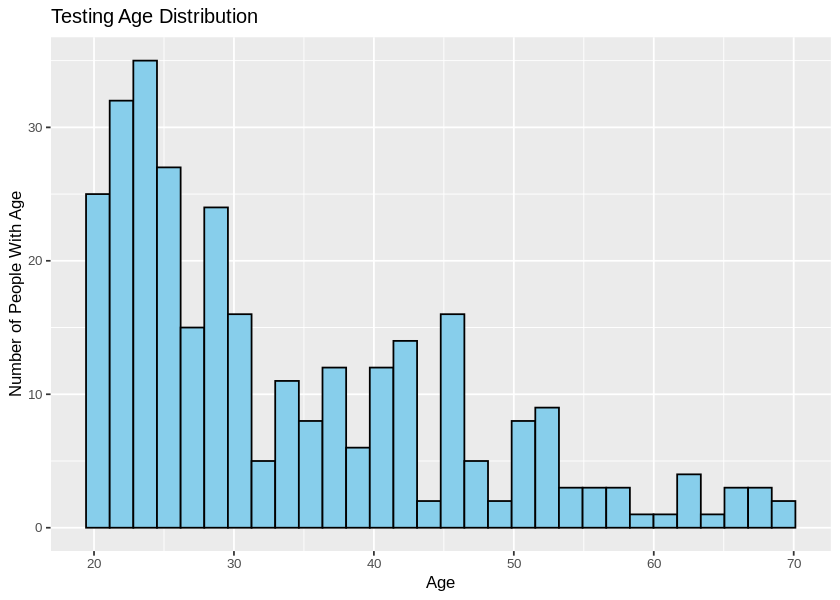

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


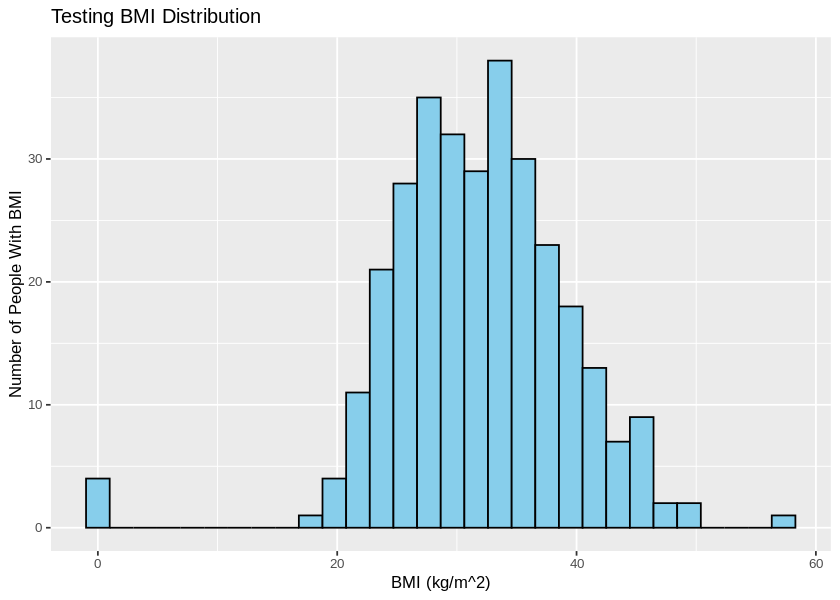

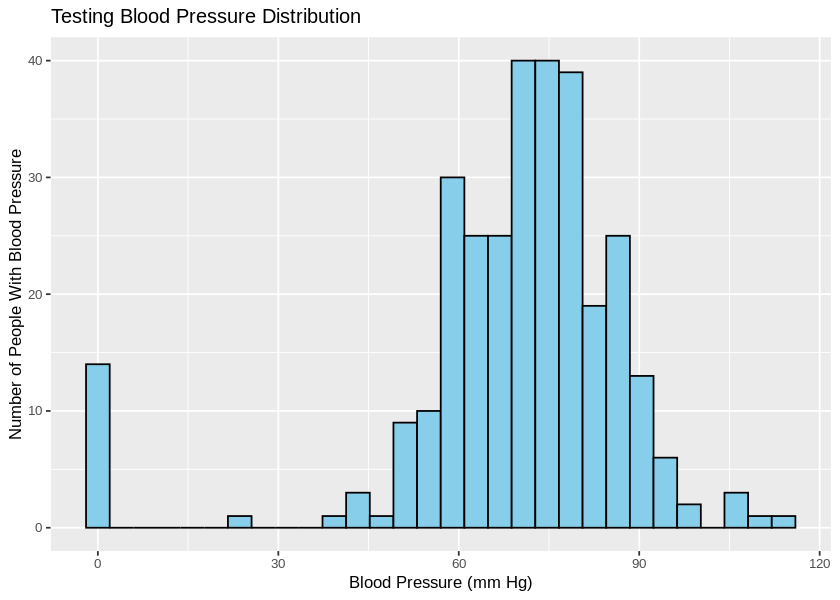

In [6]:
options(repr.plot.width=7, repr.plot.height=5)
#histogram for training age distribution
training_age_distribution <- training_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Training Age Distribution") +
    theme(text = element_text(size = 10))
training_age_distribution

#histogram for training BMI distribution
training_bmi_distribution <- training_data_small |>
    ggplot(aes(x = BMI)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "BMI (kg/m^2)", y = "Number of People With BMI") +
    ggtitle("Training BMI Distribution") +
    theme(text = element_text(size = 10))
training_bmi_distribution

#histogram for training BP distribution
training_bp_distribution <- training_data_small |>
    ggplot(aes(x = Blood_Pressure)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Blood Pressure (mm Hg)", y = "Number of People With Blood Pressure") +
    ggtitle("Training Blood Pressure Distribution") +
    theme(text = element_text(size = 10))
training_bp_distribution

#histogram for testing age distribution
testing_age_distribution <- testing_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Testing Age Distribution") +
    theme(text = element_text(size = 10))
testing_age_distribution

#histogram for testing BMI distribution
testing_bmi_distribution <- testing_data_small |>
    ggplot(aes(x = BMI)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "BMI (kg/m^2)", y = "Number of People With BMI") +
    ggtitle("Testing BMI Distribution") +
    theme(text = element_text(size = 10))
testing_bmi_distribution

#histogram for testing BP distribution
testing_bp_distribution <- testing_data_small |>
    ggplot(aes(x = Blood_Pressure)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Blood Pressure (mm Hg)", y = "Number of People With Blood Pressure") +
    ggtitle("Testing Blood Pressure Distribution") +
    theme(text = element_text(size = 10))
testing_bp_distribution

Describe histograms, compare testing and training <br>
Determining the best K-value to use by cross validation <br>
Creating the the K-nearest neighbors classifier with the training set <br>
Finalizing the model and recipe needed to train the classifier <br>
Determining the accuracy of the classifier <br>

#### 4. Describe histograms and compare the testing and training data

**Number of people with age vs Age (training vs testing)**

The training age distribution is right-skewed, with its center around the 20-30 age range, a broad spread from early 20s to over 80, and a long right tail, indicating that fewer people are represented as age increases. In comparison, the testing age distribution, also right-skewed, has a higher and narrower peak around the 20-25 age range, suggesting a younger median age, with a shorter spread, topping out around 70, and less pronounced tail, which, along with lower overall frequencies, implies a smaller sample size than the training distribution. Both distributions share a common trend of declining frequency with increasing age but differ in range and concentration of data points.

**Number of people with BMI vs BMI (training vs testing)**

Both the training and testing BMI distributions display a bell-shaped curve with a modest right skew, peaking around a BMI of 30, indicative of an overweight population segment. While the training set shows a slightly more pronounced spread towards higher BMI values, suggesting a larger or more varied sample, the testing set has a similar central tendency but with fewer high BMI outliers. Despite minor differences, the overall patterns suggest that both datasets represent comparable populations regarding BMI distribution.

In [7]:
# Make recipe/model/workflow
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = ...) |>
    set_engine("kknn") |>
    set_mode("classification")

diabetes_outcome_recipe <- recipe(Diabetes_Outcome ~ BMI + Blood_Pressure + Age, data = training_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

diabetes_outcome_fit <- workflow() |>
    add_recipe(diabetes_outcome_recipe) |>
    add_model(knn_spec) |>
    fit(data = training_data)
diabetes_outcome_fit

# Make new tibble
new_diabetes_outcome <- tibble(BMI = 31.7, Blood_Pressure = 54, Age = 26)
diabetes_predicted <- predict(diabetes_outcome_fit, new_diabetes_outcome)
diabetes_predicted

ERROR: Error in set_engine(nearest_neighbor(weight_func = "rectangular", neighbors = ...), : '...' used in an incorrect context


Number of people with age vs Age (training vs testing)

The training age distribution is right-skewed, with its center around the 20-30 age range, a broad spread from early 20s to over 80, and a long right tail, indicating that fewer people are represented as age increases. In comparison, the testing age distribution, also right-skewed, has a higher and narrower peak around the 20-25 age range, suggesting a younger median age, with a shorter spread, topping out around 70, and less pronounced tail, which, along with lower overall frequencies, implies a smaller sample size than the training distribution. Both distributions share a common trend of declining frequency with increasing age but differ in range and concentration of data points.

Number of people with BMI vs BMI (training vs testing)

Both the training and testing BMI distributions display a bell-shaped curve with a modest right skew, peaking around 
a BMI of 30, indicative of an overweight population segment. While the training set shows a slightly more pronounced 
spread towards higher BMI values, suggesting a larger or more varied sample, the testing set has a similar central tendency 
but with fewer high BMI outliers. Despite minor differences, the overall patterns suggest that both datasets represent 
comparable populations regarding BMI distribution.